In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

df=pd.read_csv('Provisional_COVID-19_Deaths_by_Place_of_Death_and_Age.csv')
dfpop=pd.read_csv('total_population.csv')#by https://www.census.gov/library/visualizations/2021/dec/2020-percent-change-map.html

In [43]:
df.columns

Index(['Data as of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'HHS Region', 'State', 'Place of Death', 'Age group', 'COVID-19 Deaths',
       'Total Deaths', 'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths',
       'Influenza Deaths', 'Pneumonia, Influenza, or COVID-19 Deaths',
       'Footnote'],
      dtype='object')

In [44]:
df1=df[df["Start Date"]=="01/01/2020"]

In [45]:
df2=df1[df1["End Date"]=="09/25/2021"]

In [46]:
df3=df.drop("Footnote",1)
df3=df3.dropna()

In [47]:
dfpop

,Total Population
0,329 135 084
1,329 237 661
2,329 342 883
3,329 459 499
4,329 588 430
5,329 726 295
6,329 877 505
7,330 047 526
8,330 215 986
9,330 382 026


In [48]:
dfpop.columns

Index(['Total Population'], dtype='object')

In [101]:
dfdeath=df[['State','Total Deaths','COVID-19 Deaths','Place of Death','Age group','End Date','Start Date']]
dfdeath=dfdeath.dropna()
dfdeath=dfdeath[dfdeath['Total Deaths']!=0]
dfdeath=dfdeath[dfdeath['COVID-19 Deaths']!=0]
dfdeath=dfdeath[dfdeath['End Date']=='09/25/2021']
dfdeath=dfdeath[dfdeath['Start Date']=='01/01/2020']
dfdeath1=dfdeath[dfdeath['Age group']=='All Ages']

dfdeath1=dfdeath1[dfdeath1['Place of Death']=='Total - All Places of Death']


In [102]:
dfdeath1

,State,Total Deaths,COVID-19 Deaths,Place of Death,Age group,End Date,Start Date
0,United States,5732125.0,687171.0,Total - All Places of Death,All Ages,09/25/2021,01/01/2020
81,Alabama,110363.0,13868.0,Total - All Places of Death,All Ages,09/25/2021,01/01/2020
162,Alaska,8048.0,490.0,Total - All Places of Death,All Ages,09/25/2021,01/01/2020
243,Arizona,133463.0,17828.0,Total - All Places of Death,All Ages,09/25/2021,01/01/2020
324,Arkansas,65995.0,7955.0,Total - All Places of Death,All Ages,09/25/2021,01/01/2020
405,California,556319.0,71430.0,Total - All Places of Death,All Ages,09/25/2021,01/01/2020
486,Colorado,80123.0,7852.0,Total - All Places of Death,All Ages,09/25/2021,01/01/2020
567,Connecticut,59721.0,8515.0,Total - All Places of Death,All Ages,09/25/2021,01/01/2020
648,Delaware,18621.0,1898.0,Total - All Places of Death,All Ages,09/25/2021,01/01/2020
729,District of Columbia,12323.0,1552.0,Total - All Places of Death,All Ages,09/25/2021,01/01/2020


In [103]:
np.array(dfdeath1)[:,0]
dfdeath1["State"].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico'], dtype=object)

In [124]:
label=dfdeath1["State"].unique()
def plotdeath(df):
    df=np.array(df)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    darray=np.array(df)
    perc=darray[:,2]/darray[:,1]
    ax.bar(label,perc)
    plt.title("Proportion of COVID-19 Deaths over the total Deaths in different states")
    plt.xlabel("States")
    plt.ylabel("Percentage")
    plt.show()


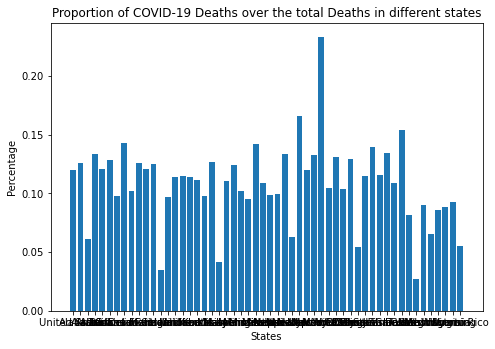

In [126]:
plotdeath(dfdeath1)

In [131]:
dfdeath2=dfdeath[dfdeath['State']=='United States']
dfdeath2=dfdeath2[dfdeath2['Place of Death']=='Total - All Places of Death']
#dfdeath2=dfdeath2[dfdeath2['Age group']!='All Ages']

dfdeath2

,State,Total Deaths,COVID-19 Deaths,Place of Death,Age group,End Date,Start Date
0,United States,5732125.0,687171.0,Total - All Places of Death,All Ages,09/25/2021,01/01/2020
1,United States,57465.0,478.0,Total - All Places of Death,0-17 years,09/25/2021,01/01/2020
2,United States,109253.0,3573.0,Total - All Places of Death,18-29 years,09/25/2021,01/01/2020
3,United States,157634.0,10324.0,Total - All Places of Death,30-39 years,09/25/2021,01/01/2020
4,United States,235139.0,25978.0,Total - All Places of Death,40-49 years,09/25/2021,01/01/2020
5,United States,962542.0,118573.0,Total - All Places of Death,50-64 years,09/25/2021,01/01/2020
6,United States,1163333.0,154373.0,Total - All Places of Death,65-74 years,09/25/2021,01/01/2020
7,United States,1386540.0,182510.0,Total - All Places of Death,75-84 years,09/25/2021,01/01/2020
8,United States,1660219.0,191362.0,Total - All Places of Death,85 years and over,09/25/2021,01/01/2020


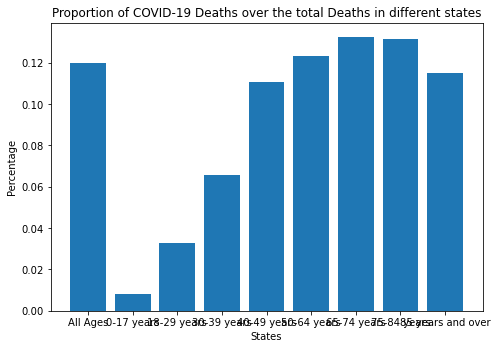

In [134]:
label=dfdeath["Age group"].unique()
plotdeath(dfdeath2)

In [133]:
dfdeath3=dfdeath[dfdeath['State']=='United States']
#dfdeath3=dfdeath3[dfdeath2['Place of Death']=='Total - All Places of Death']
dfdeath3=dfdeath3[dfdeath3['Age group']=='All Ages']

dfdeath3

,State,Total Deaths,COVID-19 Deaths,Place of Death,Age group,End Date,Start Date
0,United States,5732125.0,687171.0,Total - All Places of Death,All Ages,09/25/2021,01/01/2020
9,United States,1789018.0,459474.0,"Healthcare setting, inpatient",All Ages,09/25/2021,01/01/2020
18,United States,340335.0,22944.0,"Healthcare setting, outpatient or emergency room",All Ages,09/25/2021,01/01/2020
27,United States,16022.0,649.0,"Healthcare setting, dead on arrival",All Ages,09/25/2021,01/01/2020
36,United States,1926400.0,52208.0,Decedent's home,All Ages,09/25/2021,01/01/2020
45,United States,348368.0,20672.0,Hospice facility,All Ages,09/25/2021,01/01/2020
54,United States,919052.0,117255.0,Nursing home/long term care facility,All Ages,09/25/2021,01/01/2020
63,United States,391933.0,13857.0,Other,All Ages,09/25/2021,01/01/2020
72,United States,997.0,112.0,Place of death unknown,All Ages,09/25/2021,01/01/2020


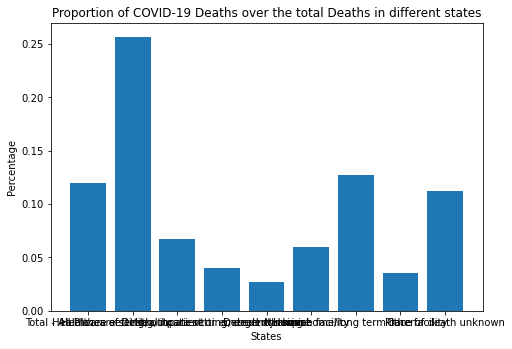

In [135]:
label=dfdeath["Place of Death"].unique()
plotdeath(dfdeath3)